<a href="https://colab.research.google.com/github/ava11235/it125/blob/main/week9_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading
zyBooks 7.1 - 7.4

Reading Notes (see below)

# Reference

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html



# Examples
See below

# Practice
zyBooks Participation activity (graded): 7.1 - 7.4

# Learning Outcomes:
Upon successful completion of the material, students will be able to:
* Define what is a time series
* Identify time series patterns and stationarity
* Use moving average and exonential smoothing forecasting
* Forecast using linear regression


# Reading 

A **time series** is a sequence of data points over constant time periods.

Time series can be used to establish trends and make predictions.  In Python time series are manipulated with the pandas and some of the statistical libraries, including numpy. Visualization can be created using matplotlib and seaborn. 

Time series analysis uses techniques for examining and analyzing the series for trends.  For example, a model based on the previous data points could be built  in order to predict future data points.
These are the main factors contributing to variations in time series data: 

* Trends: Increases, decreases or remains the same over time
* Seasonal: Patterns repeat periodically over time
* Movements Cyclical: Patterns increase and decrease, such as in business cycles
* Movements Random or Irregular: Increases or decreases without an apparent pattern


As always, it is a good idea to view the data visually as first step in your analysis.

Tools for time series analysis include:

Naive forecasting

* Average forecasting
* Moving averages
* Forecasting using regression

There are tradoffs between the different approaches.

Time series analysis is applied to various domains, including stock markets, sales, weather, etc. 

Google Trends

https://trends.google.com/trends/?geo=US

"Numbers represent search interest relative to the highest point on the chart for the given region and time. 
A value of 100 is the peak popularity for the term. 
A value of 50 means that the term is half as popular.
Likewise a score of 0 means the term was less than 1% as popular as the peak. "

Adapted from FiveThirtyEight



In [ ]:
# Google keyword trends over time and seasonally

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
# import data

df = pd.read_csv('https://raw.githubusercontent.com/ava11235/it125/main/datasets/multiTimeline_5yrs.csv', skiprows = 1)
df.head()



,Week,diet: (United States),gym: (United States),finance: (United States)
0,2016-06-05,54,36,40
1,2016-06-12,52,34,36
2,2016-06-19,51,34,40
3,2016-06-26,50,36,42
4,2016-07-03,51,44,35


In [50]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Week                      261 non-null    object
 1   diet: (United States)     261 non-null    int64 
 2   gym: (United States)      261 non-null    int64 
 3   finance: (United States)  261 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 8.3+ KB


In [51]:
# Reassign column names to remove white space 
df.columns = ['week', 'diet', 'gym', 'finance']
df.head()

,week,diet,gym,finance
0,2016-06-05,54,36,40
1,2016-06-12,52,34,36
2,2016-06-19,51,34,40
3,2016-06-26,50,36,42
4,2016-07-03,51,44,35


In [53]:
# Convert the type of month from object to DateTime 
df['week']= pd.to_datetime(df['week'])

# Set the week column to be the index of the df
df.set_index('week', inplace=True)

df.head()

,diet,gym,finance
week,,,
2016-06-05,54,36,40
2016-06-12,52,34,36
2016-06-19,51,34,40
2016-06-26,50,36,42
2016-07-03,51,44,35


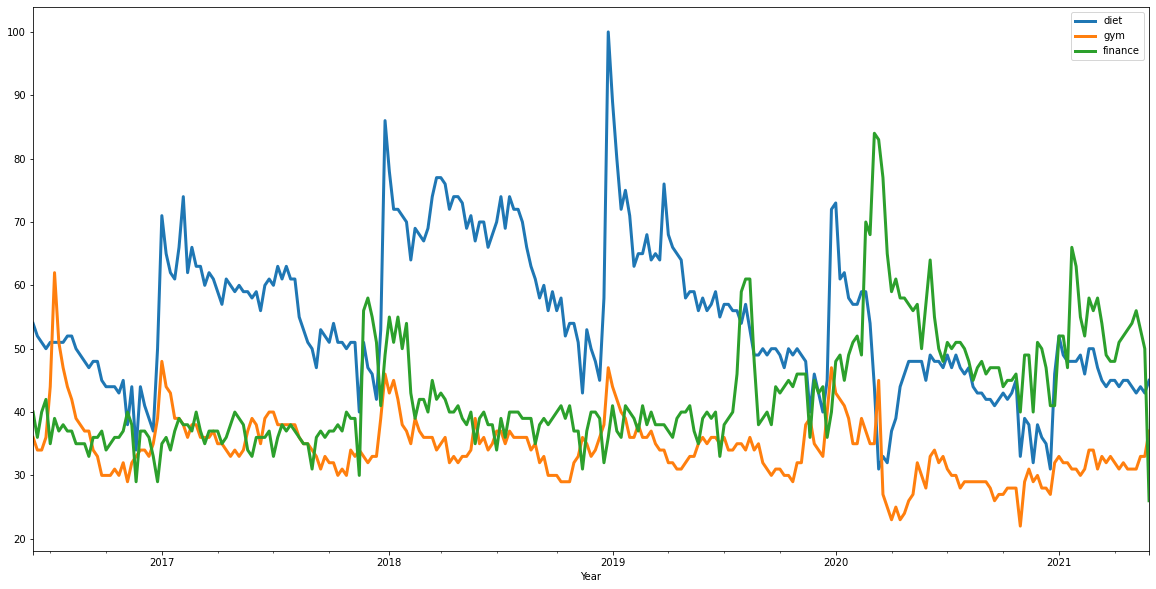

In [54]:
df.plot(figsize=(20, 10), linewidth=3)
plt.xlabel('Year');

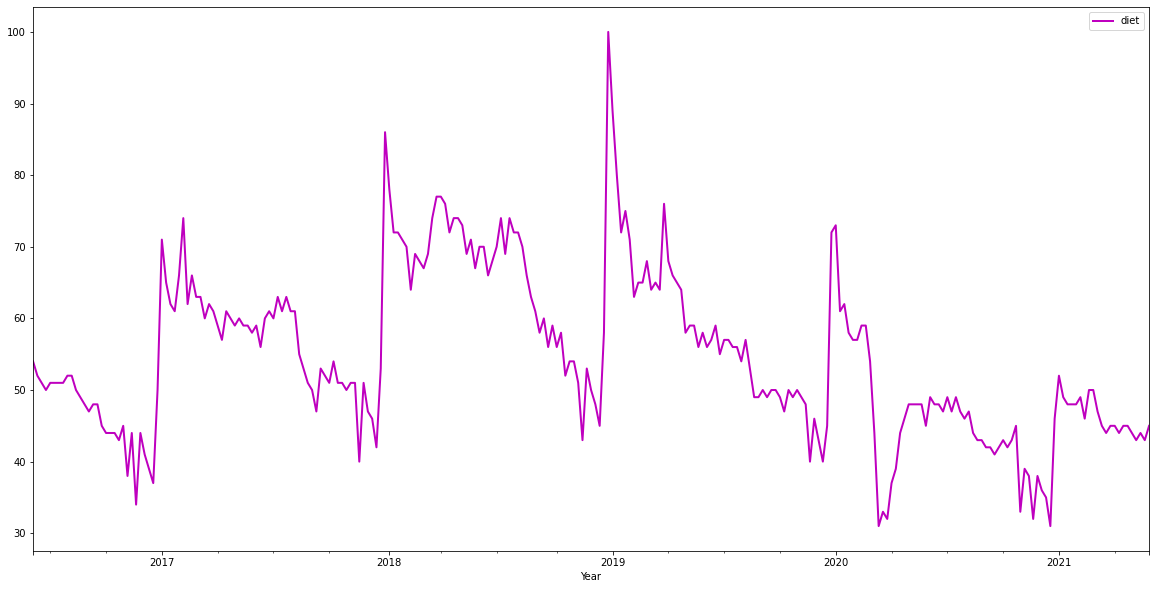

In [55]:
# Plot only diet as a time series

df[['diet']].plot(figsize=(20, 10), linewidth=2, color='m')
plt.xlabel('Year');

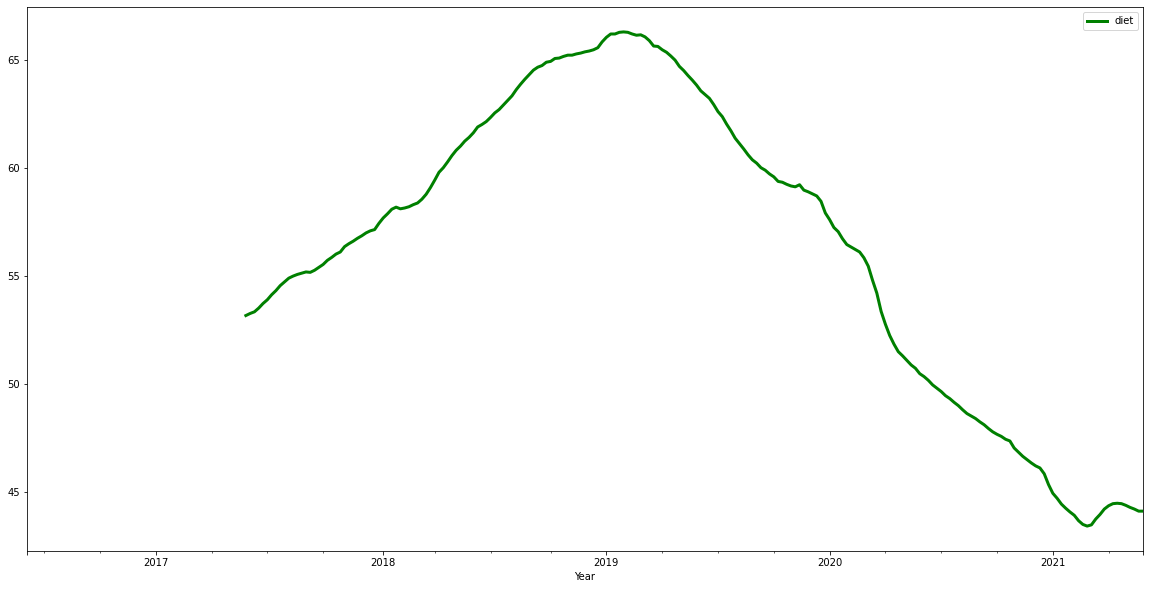

In [79]:
# Identify trends in the time series with the use of rolling average
# for each point calculate the average of the points on either side of it
# Number points is determined by the window size, in this case we chose one of twelve months)

diet = df[['diet']] # use two brackets to extract a dataframe rather than a series

diet.rolling(52).mean().plot(figsize=(20, 10), linewidth=3, color='g')
plt.xlabel('Year');


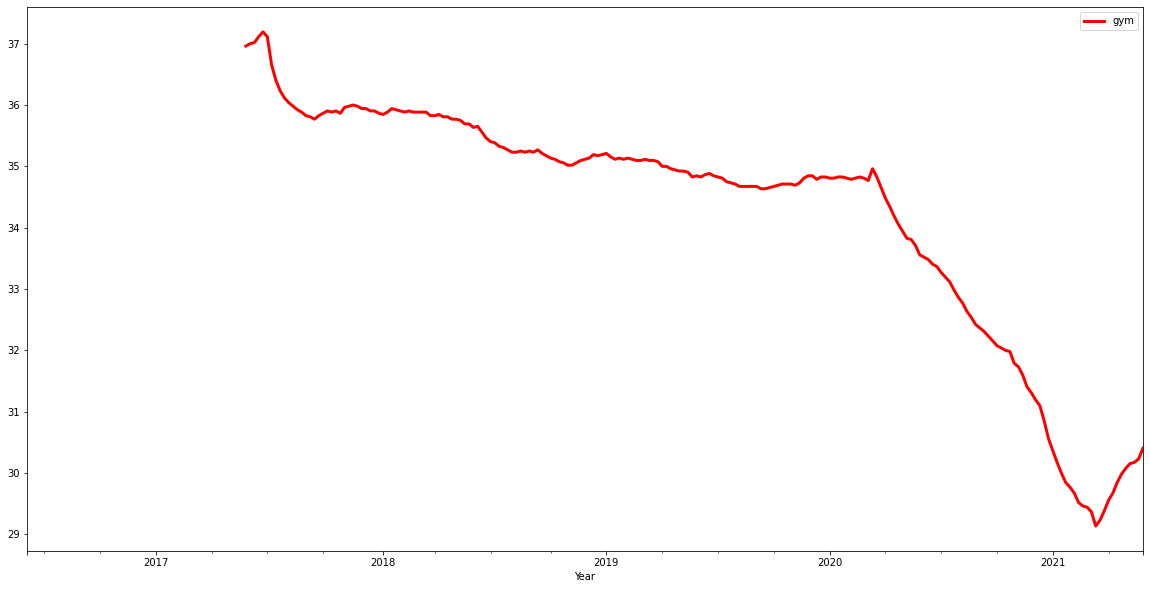

In [80]:
gym = df[['gym']]
gym.rolling(52).mean().plot(figsize=(20, 10), linewidth=3, color='r')
plt.xlabel('Year');

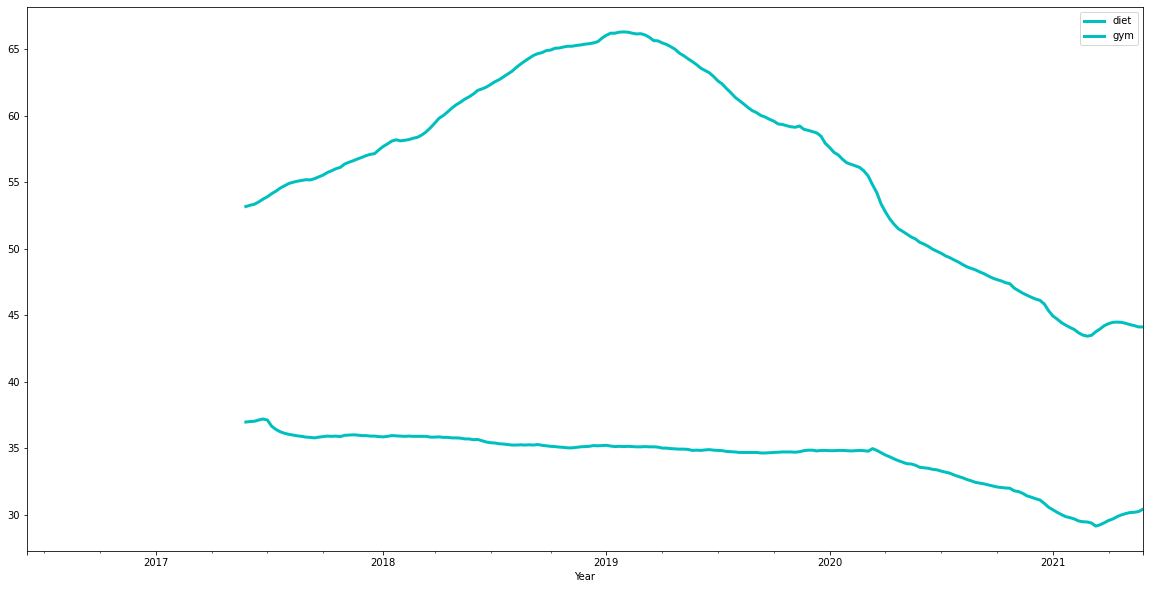

In [81]:
# Plot gym and diet on the same figure to see how the trends compare
# use pd_concat to concat the columns as a list
df_rm = pd.concat([diet.rolling(52).mean(), gym.rolling(52).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=3, color='c')
plt.xlabel('Year');

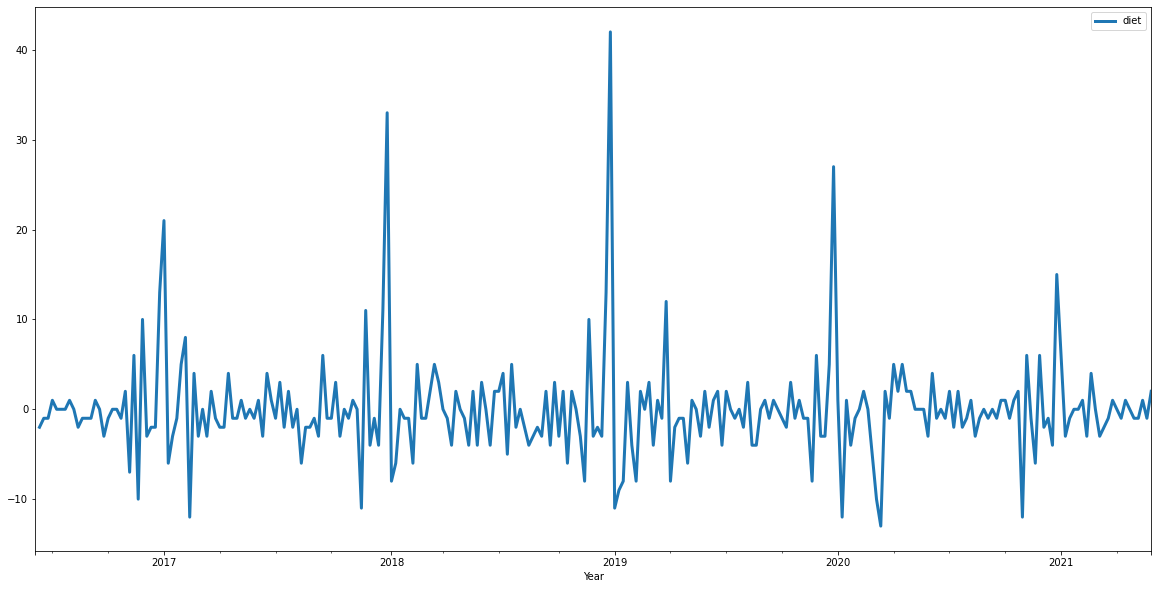

In [63]:
# Use differencing to remove the trend  by stabilizing the mean 
# You are looking at the difference between a data point and the one before it
#  Data peaks in January
diet.diff().plot(figsize=(20,10), linewidth=3)
plt.xlabel('Year');

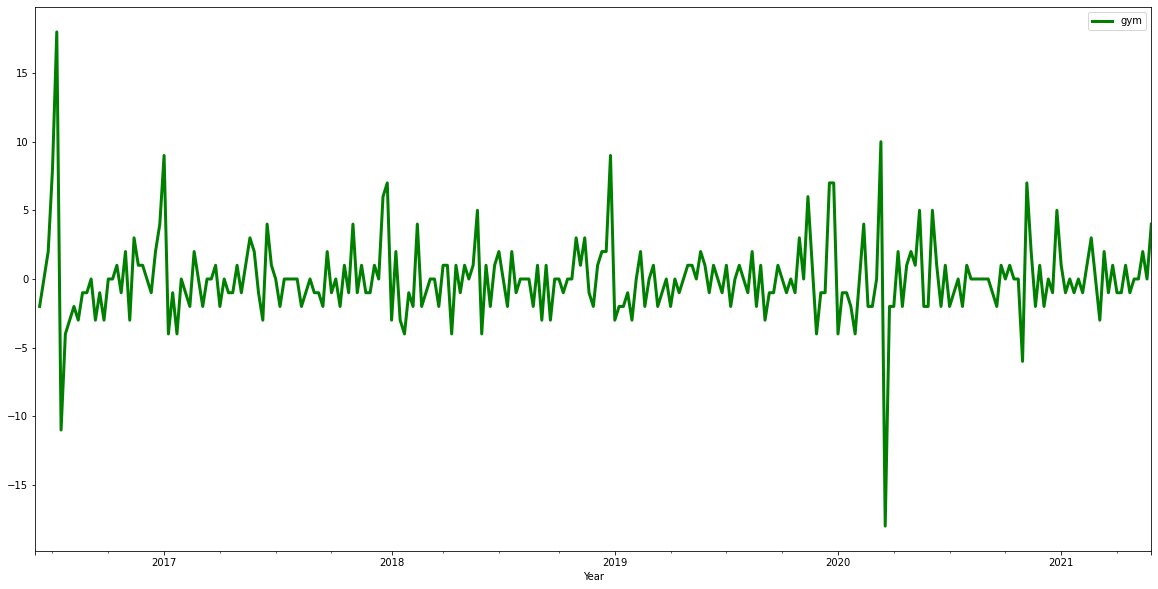

In [76]:

gym.diff().plot(figsize=(20,10), linewidth=3, color='g')
plt.xlabel('Year');